# 4.4 - Series Temporales

![time_series](images/time_series.jpg)

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import pylab as plt

In [3]:
df=pd.read_csv('data/occupancy.csv')

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2664 non-null   object 
 1   Temperature    2664 non-null   float64
 2   Humidity       2664 non-null   float64
 3   Light          2664 non-null   float64
 4   CO2            2664 non-null   float64
 5   HumidityRatio  2664 non-null   float64
 6   Occupancy      2664 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.8+ KB


In [5]:
df.date = pd.to_datetime(df.date)

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2664 non-null   datetime64[ns]
 1   Temperature    2664 non-null   float64       
 2   Humidity       2664 non-null   float64       
 3   Light          2664 non-null   float64       
 4   CO2            2664 non-null   float64       
 5   HumidityRatio  2664 non-null   float64       
 6   Occupancy      2664 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 145.8 KB


In [7]:
# pasar la fecha al indice

df = df.set_index('date')

df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


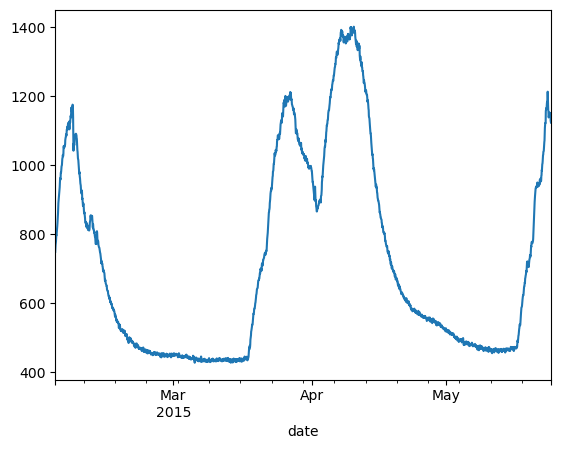

In [8]:
df.CO2.plot();

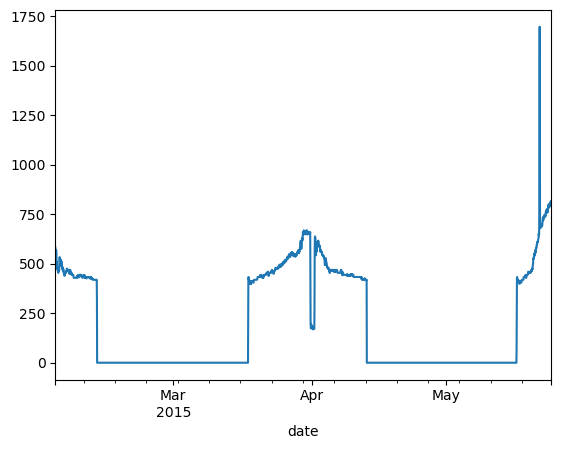

In [9]:
df.Light.plot();

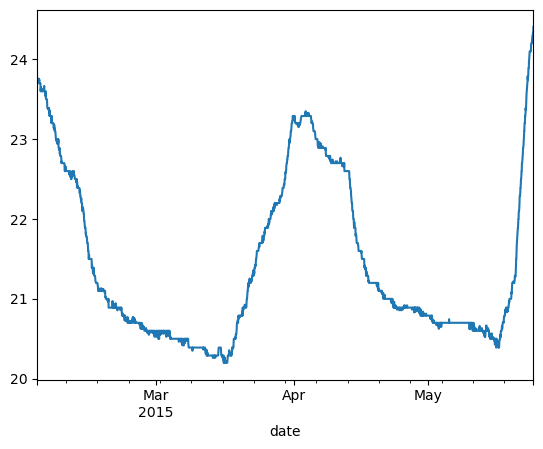

In [10]:
df.Temperature.plot();

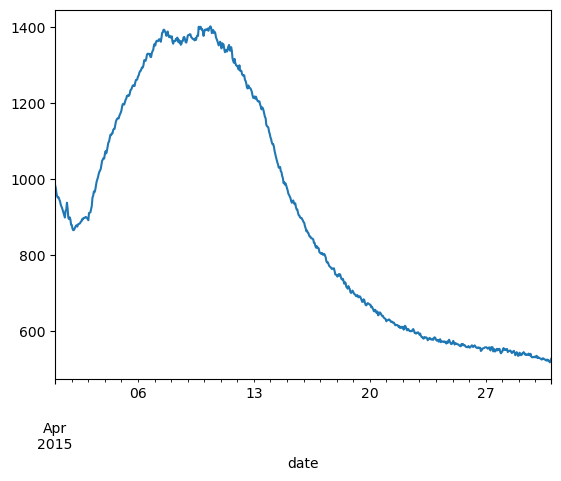

In [11]:
dias = df.CO2.loc['2015-4-1': '2015-4-30']

dias.plot();

### Autoregresión - AR

El modelo usa la relación de dependencia del momento actual con $n$ momentos anteriores. Es, en realidad, una regresión lineal.

$$y_t = \beta_0+\beta_1y_{t-1}+\beta_2y_{t-2}+\ldots+\beta_ny_{t-n}+\epsilon_t$$

Si solamente nos fijamos en el momento anterior, $t-1$, entonces:

$$y_t = \beta_0+\beta_1y_{t-1}+\epsilon_t$$

Es la llamada Cadena de Markov

In [12]:
from pandas.plotting import lag_plot

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

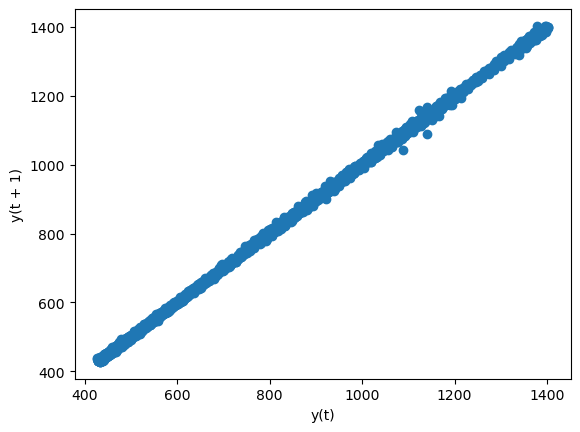

In [13]:
lag_plot(df.CO2)

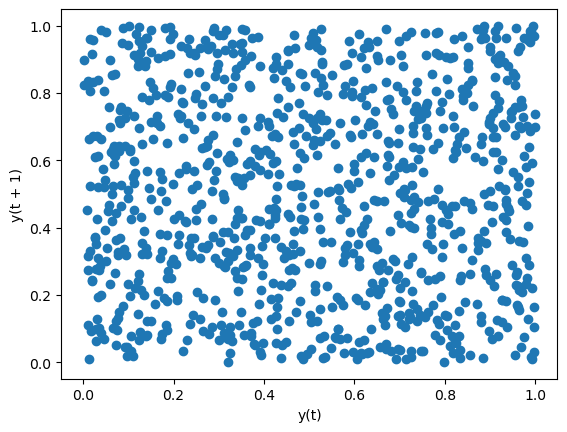

In [14]:
# datos random

lag_plot(pd.Series(np.random.random(1000)));

In [15]:
# AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
train, test = df.CO2[:-10], df.CO2[-10:]

train.shape, test.shape

((2654,), (10,))

In [17]:
modelo = AR(train, lags=1).fit()

# lags=1 es la cadena de Markov, lags son los pasos atras que mira

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [18]:
len(train), len(df.CO2)-1  

(2654, 2663)

In [19]:
# por indice para predecir

pred = modelo.predict(len(train), len(df.CO2)-1)

len(pred)

10

In [20]:
pred

2015-05-24 04:00:00    1152.762619
2015-05-24 05:00:00    1153.025305
2015-05-24 06:00:00    1153.288058
2015-05-24 07:00:00    1153.550877
2015-05-24 08:00:00    1153.813763
2015-05-24 09:00:00    1154.076715
2015-05-24 10:00:00    1154.339734
2015-05-24 11:00:00    1154.602820
2015-05-24 12:00:00    1154.865972
2015-05-24 13:00:00    1155.129191
Freq: H, dtype: float64

In [21]:
test

date
2015-05-24 04:00:00    1153.250000
2015-05-24 05:00:00    1152.400000
2015-05-24 06:00:00    1146.166667
2015-05-24 07:00:00    1145.400000
2015-05-24 08:00:00    1140.800000
2015-05-24 09:00:00    1150.250000
2015-05-24 10:00:00    1129.200000
2015-05-24 11:00:00    1125.800000
2015-05-24 12:00:00    1123.000000
2015-05-24 13:00:00    1124.000000
Name: CO2, dtype: float64

In [22]:
# error medio absoluto MAE


error = (pred - test).abs().sum()/len(pred)  

error

15.016314895077766

In [23]:
res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2015-05-24 04:00:00,1153.250000,1152.762619,-0.487381
2015-05-24 05:00:00,1152.400000,1153.025305,0.625305
2015-05-24 06:00:00,1146.166667,1153.288058,7.121391
2015-05-24 07:00:00,1145.400000,1153.550877,8.150877
2015-05-24 08:00:00,1140.800000,1153.813763,13.013763
2015-05-24 09:00:00,1150.250000,1154.076715,3.826715
2015-05-24 10:00:00,1129.200000,1154.339734,25.139734
2015-05-24 11:00:00,1125.800000,1154.602820,28.802820
2015-05-24 12:00:00,1123.000000,1154.865972,31.865972
2015-05-24 13:00:00,1124.000000,1155.129191,31.129191


In [24]:
import warnings
warnings.simplefilter('ignore')

for i in range(10, 20, 1):
    
    modelo=AR(train, lags=i).fit()                     # entrenar la AR
    
    pred=modelo.predict(len(train), len(df.CO2)-1)     # la prediccion en el intervalo
    
    error=(pred-test).abs().sum()/len(pred)            # error medio absoluto
    
    print ('Error mae: ', error.round(5), '  Maxlag : ', i)

Error mae:  8.50887   Maxlag :  10
Error mae:  7.62306   Maxlag :  11
Error mae:  7.16723   Maxlag :  12
Error mae:  6.40127   Maxlag :  13
Error mae:  5.26263   Maxlag :  14
Error mae:  4.99467   Maxlag :  15
Error mae:  4.97313   Maxlag :  16
Error mae:  5.64878   Maxlag :  17
Error mae:  6.50483   Maxlag :  18
Error mae:  7.29856   Maxlag :  19


### Media Móvil (Moving Average MA)

Una manera matemática de expresar la MA puede ser:

$$y_t = \beta_0+\epsilon_t+\epsilon_{t-1}\phi_{t-1}+\epsilon_{t-2}\phi_{t-2}+\ldots+\epsilon_{t-n}\phi_{t-n}$$


Se usa la relación entre las observaciones y el error residual de la media móvil.

Otra es la evidente, la media móvil, se muestra en el gráfico.

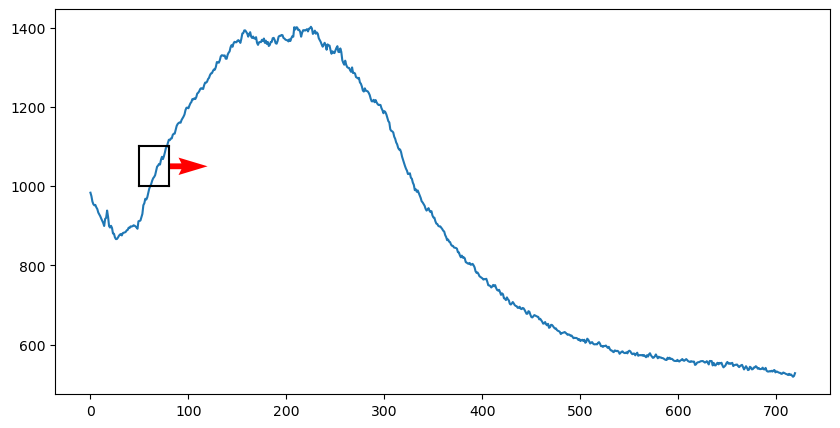

In [25]:
plt.figure(figsize=(10, 5))

plt.plot(dias.values)

plt.plot([50, 80],[1000, 1000], color='black')
plt.plot([50, 50],[1000, 1100], color='black')
plt.plot([50, 80],[1100, 1100], color='black')
plt.plot([80, 80],[1000, 1100], color='black')

plt.quiver(80, 1050, 1, 0, scale=20, color='r');

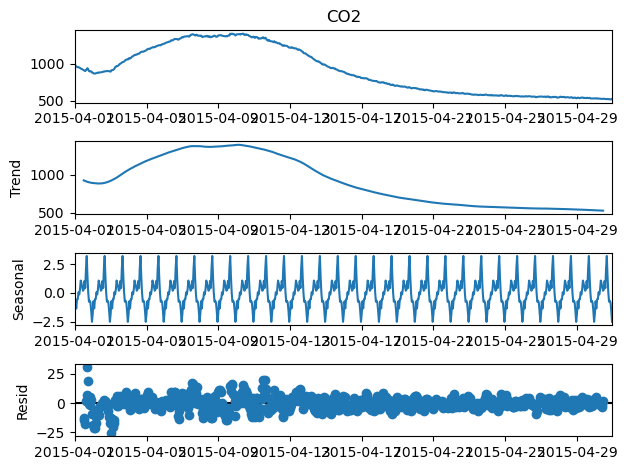

In [26]:
import statsmodels.api as sm

res=sm.tsa.seasonal_decompose(dias)

resplot=res.plot()

### ARMA (AutoRegressive Moving Average)

Unión de ambos conceptos.

$$y_t = \beta_0 + \epsilon_t + \sum_{i=1}^{n}\beta_iy_{t-i} + \sum_{i=1}^{m}\phi_i\epsilon_{t-i}$$

In [27]:
# ARIMA  order==> (p, d, q)  d=>Integrated , d=0 es ARMA

# ARMA  order==> p=>AR (n, maxlag), q=>MA (m, ancho de la ventana)

from statsmodels.tsa.arima.model import ARIMA

In [28]:
%%time

modelo=ARIMA(train, order=(16, 0, 3)).fit()  # d=0 implica ARMA

CPU times: user 8.41 s, sys: 593 ms, total: 9 s
Wall time: 7.18 s


In [29]:
pred=modelo.predict(len(train), len(df.CO2)-1) 

error=(pred-test).abs().sum()/len(pred) 

print ('Error mae: ', error)

res=pd.DataFrame({'real':test, 'pred':pred, 'error':pred-test})

res

Error mae:  15.708393323041946


,real,pred,error
2015-05-24 04:00:00,1153.250000,1153.365846,0.115846
2015-05-24 05:00:00,1152.400000,1152.938572,0.538572
2015-05-24 06:00:00,1146.166667,1153.061681,6.895014
2015-05-24 07:00:00,1145.400000,1154.338221,8.938221
2015-05-24 08:00:00,1140.800000,1155.057075,14.257075
2015-05-24 09:00:00,1150.250000,1155.478864,5.228864
2015-05-24 10:00:00,1129.200000,1155.682302,26.482302
2015-05-24 11:00:00,1125.800000,1156.121413,30.321413
2015-05-24 12:00:00,1123.000000,1155.846848,32.846848
2015-05-24 13:00:00,1124.000000,1155.459779,31.459779


### ARIMA (AutoRegressive Integrated Moving Average)

Lo de Integrated trata de hacer la serie temporal estacionaria, similar al concepto de PID.

In [30]:
%%time

modelo=ARIMA(train, order=(4, 1, 2)).fit()

                     
pred=modelo.predict(len(train), len(df.CO2)-1) 

error=(pred-test).abs().sum()/len(pred) 

print ('Error mae: ', error)

res=pd.DataFrame({'real':test, 'pred':pred, 'error':pred-test})
res

Error mae:  17.33208608482107
CPU times: user 1.85 s, sys: 399 ms, total: 2.25 s
Wall time: 446 ms


,real,pred,error
2015-05-24 04:00:00,1153.250000,1153.285761,0.035761
2015-05-24 05:00:00,1152.400000,1153.607865,1.207865
2015-05-24 06:00:00,1146.166667,1154.459560,8.292893
2015-05-24 07:00:00,1145.400000,1155.189745,9.789745
2015-05-24 08:00:00,1140.800000,1156.021367,15.221367
2015-05-24 09:00:00,1150.250000,1156.710475,6.460475
2015-05-24 10:00:00,1129.200000,1157.501011,28.301011
2015-05-24 11:00:00,1125.800000,1158.197106,32.397106
2015-05-24 12:00:00,1123.000000,1158.960983,35.960983
2015-05-24 13:00:00,1124.000000,1159.653655,35.653655


### ADF-test (testeo de la estacionaridad)

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

### SARIMA (Seasonal AutoRegressive Integrated Moving Average)
Arima por estaciones.

### SARIMAX (Seasonal AutoRegressive Integrated Moving Average Exogenous)
SARIMA con regresores exógenos.

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#help(SARIMAX)

In [32]:
%%time

modelo=SARIMAX(endog=train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(4, 1, 5, 2) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(train), len(df.CO2)-1)  

error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':test, 'pred':pred, 'error':pred-test})
res

Error mae:  23.71677690108377
CPU times: user 4.5 s, sys: 468 ms, total: 4.97 s
Wall time: 3.04 s


,real,pred,error
2015-05-24 04:00:00,1153.250000,1155.944783,2.694783
2015-05-24 05:00:00,1152.400000,1155.687332,3.287332
2015-05-24 06:00:00,1146.166667,1159.952051,13.785384
2015-05-24 07:00:00,1145.400000,1159.650394,14.250394
2015-05-24 08:00:00,1140.800000,1163.182482,22.382482
2015-05-24 09:00:00,1150.250000,1162.561503,12.311503
2015-05-24 10:00:00,1129.200000,1165.790653,36.590653
2015-05-24 11:00:00,1125.800000,1165.587561,39.787561
2015-05-24 12:00:00,1123.000000,1169.748092,46.748092
2015-05-24 13:00:00,1124.000000,1169.329586,45.329586


## FB-Prophet

https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
%pip install prophet

In [ ]:
%pip install pystan==2.19.1.1

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from prophet import Prophet


from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')

In [34]:
# datos, consumo de energia

pjme=pd.read_csv('data/PJME_hourly.csv', index_col=[0], parse_dates=[0])
pjme.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


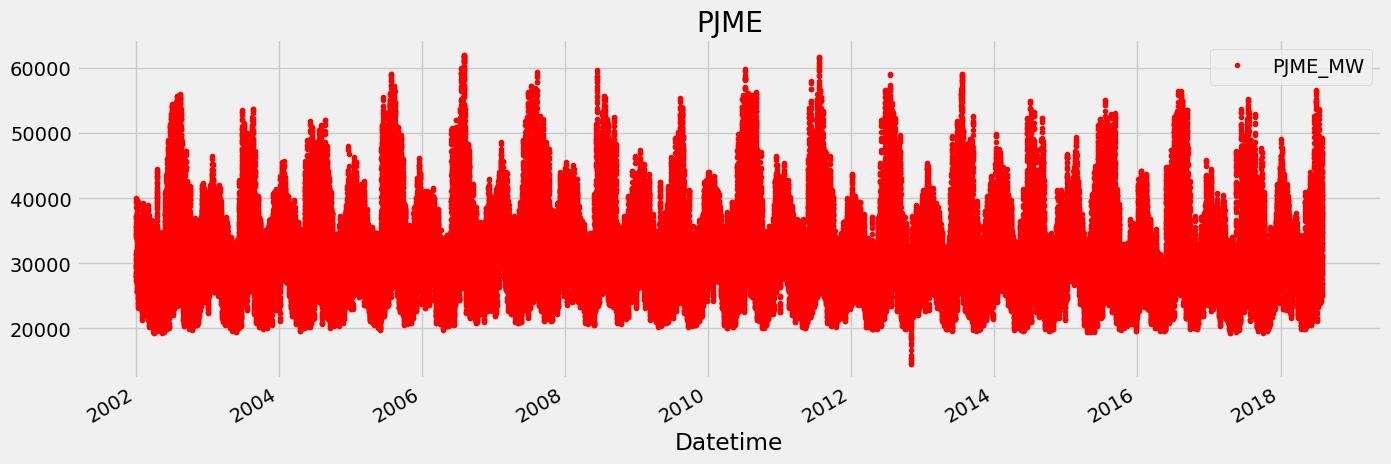

In [35]:
_=pjme.plot(style='.', figsize=(15, 5), color='r', title='PJME')

In [36]:
# se definen las caracteristicas temporales

def features(df, label):
    
    df=df.copy()
    
    df['date']=df.index
    df['hour']=df.date.dt.hour
    df['day_of_week']=df.date.dt.dayofweek
    df['quarter']=df.date.dt.quarter
    df['month']=df.date.dt.month
    df['year']=df.date.dt.year
    df['day_of_year']=df.date.dt.dayofyear
    df['day_of_month']=df.date.dt.day
    df['week_of_year']=df.date.dt.weekofyear
    
    X=df[['hour', 'day_of_week', 'quarter', 'month', 'year',
          'day_of_year', 'day_of_month', 'week_of_year']]
    y=df[label]
    
    return X,y

In [37]:
X, y = features(pjme, 'PJME_MW')

data=pd.concat([X, y], axis=1)

data.head()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0


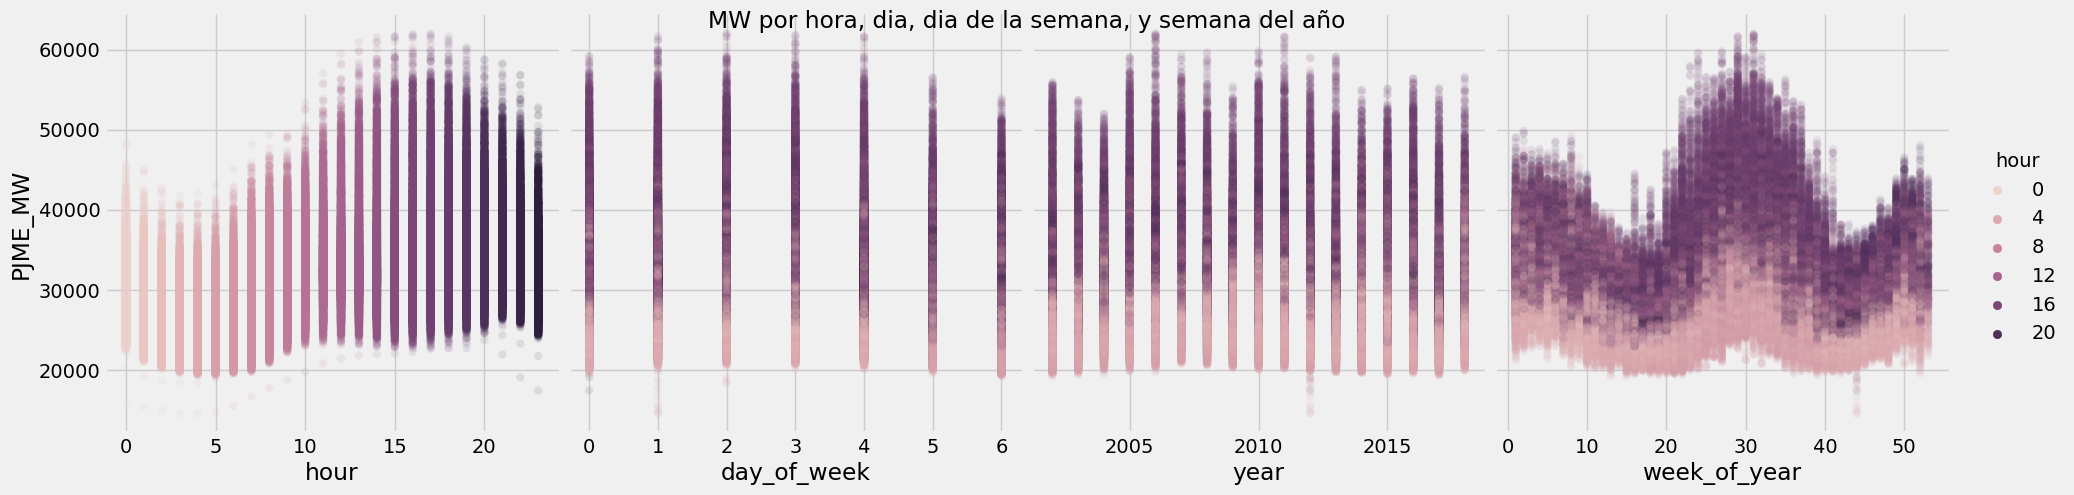

In [38]:
sns.pairplot(data.dropna(), 
             hue='hour', 
             x_vars=['hour', 'day_of_week', 'year', 'week_of_year'],
             y_vars='PJME_MW', 
             height=5, plot_kws={'alpha':0.1, 'linewidth':0})

plt.suptitle('MW por hora, dia, dia de la semana, y semana del año')
plt.show();

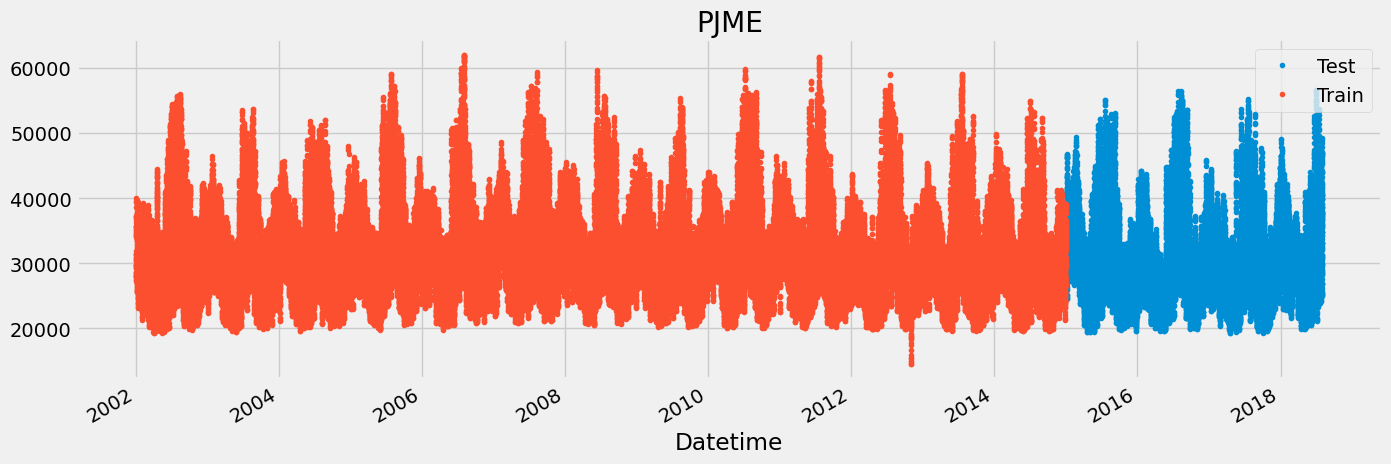

In [39]:
split_date='01-Jan-2015'

train=pjme.loc[pjme.index<=split_date].copy()

test=pjme.loc[pjme.index>split_date].copy()

_=test.rename(columns={'PJME_MW': 'Test'})\
      .join(train.rename(columns={'PJME_MW': 'Train'}), how='outer')\
      .plot(figsize=(15,5), title='PJME', style='.')

In [40]:
# IMPORTANTE, fbprophet necesita estos nombres de columnas

train=train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})

test=test.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})

train.head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [41]:
test.head()

,ds,y
0,2015-12-31 01:00:00,24305.0
1,2015-12-31 02:00:00,23156.0
2,2015-12-31 03:00:00,22514.0
3,2015-12-31 04:00:00,22330.0
4,2015-12-31 05:00:00,22773.0


In [42]:
%%time

modelo=Prophet().fit(train)

pred=modelo.predict(test)

11:30:41 - cmdstanpy - INFO - Chain [1] start processing
11:31:18 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 10.6 s, sys: 1.6 s, total: 12.2 s
Wall time: 47.8 s


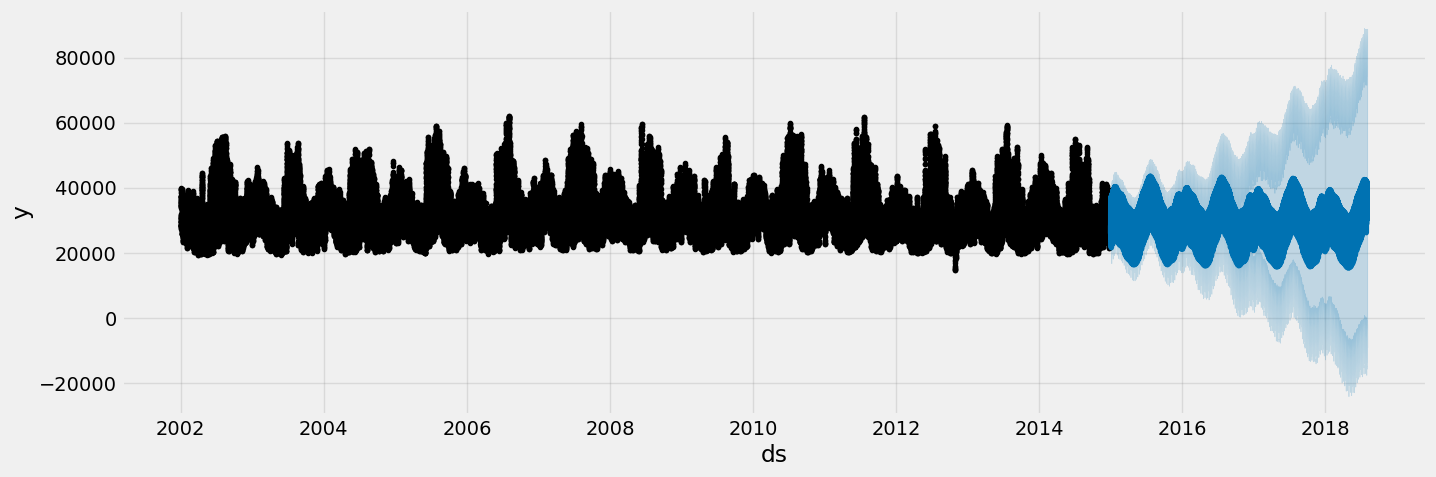

In [43]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

fig=modelo.plot(pred, ax=ax)

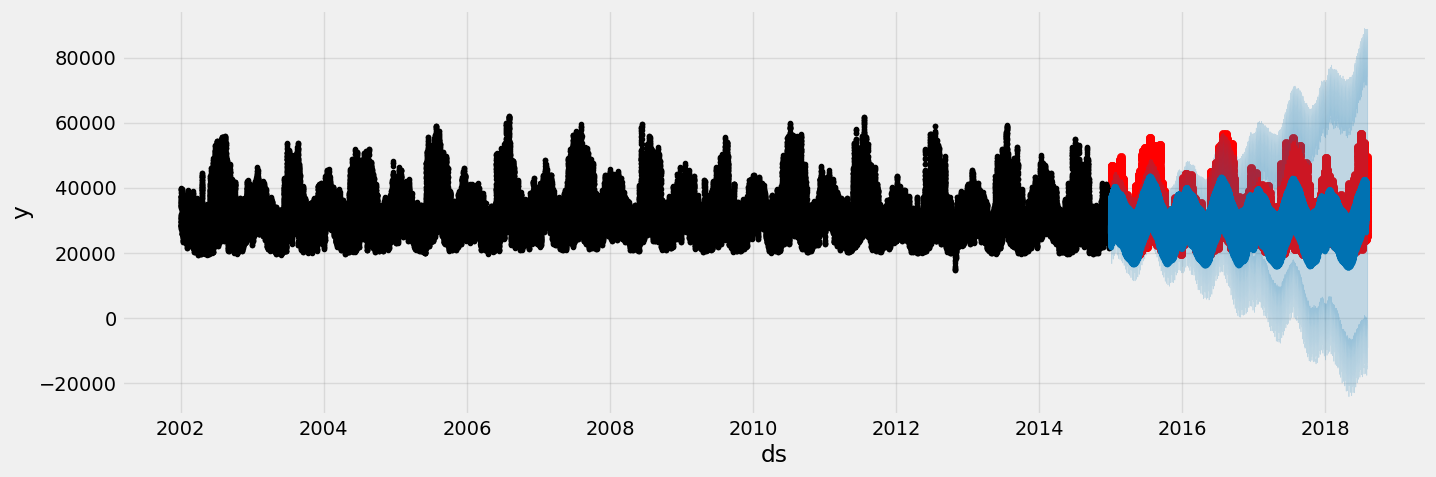

In [44]:
# comparando

f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig=modelo.plot(pred, ax)

In [45]:
# metricas de error

mean_squared_error(test.y, pred.yhat)**0.5

6617.434811308175

In [46]:
# Con vacaciones

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()

train_h = cal.holidays(train.index.min(), train.index.max())

test_h = cal.holidays(test.index.min(), test.index.max())

In [47]:
pjme['date'] = pjme.index.date

pjme['is_holiday'] = pjme.date.isin([d.date() for d in cal.holidays()])

df_h = pjme.loc[pjme['is_holiday']].reset_index().rename(columns={'Datetime':'ds'})

df_h['holiday'] = 'USFederalHoliday'

df_h = df_h.drop(['PJME_MW','date','is_holiday'], axis=1)

df_h.head()

,ds,holiday
0,2003-01-01 00:00:00,USFederalHoliday
1,2002-12-25 01:00:00,USFederalHoliday
2,2002-12-25 02:00:00,USFederalHoliday
3,2002-12-25 03:00:00,USFederalHoliday
4,2002-12-25 04:00:00,USFederalHoliday


In [ ]:
modelo_h=Prophet(holidays=df_h).fit(train)

fig2=modelo_h.plot_components(pred)

11:31:29 - cmdstanpy - INFO - Chain [1] start processing
11:32:03 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
pred_h=modelo_h.predict(test)

pred_h.head()

In [ ]:
mean_squared_error(test.y, pred_h.yhat, squared=False)

### Yahoo Finance

In [ ]:
%pip install yfinance

In [ ]:
import pandas as pd

import yfinance as yf

import time

In [ ]:
data=yf.download(tickers='AAPL', period='5d', interval='1m')

data['datetime']=data.index

data.to_dict(orient='records')[-1]

In [ ]:
data=yf.download(tickers='UBER', period='5d', interval='1m')

data['datetime']=data.index

data.to_dict(orient='records')[-1]

In [ ]:
data=yf.download(tickers='^DJI', period='5d', interval='1m')

data['datetime']=data.index

data.to_dict(orient='records')[-1]

In [ ]:
data=yf.download(tickers='^IBEX', period='5d', interval='1m')

data['datetime']=data.index

data.tail()

In [ ]:
while 1:
    data=yf.download(tickers='^IBEX', period='5d', interval='1m')

    data['datetime']=data.index

    print(data.tail(1))
    
    time.sleep(0.5)